In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from mpl_toolkits import mplot3d

In [52]:
"""
Example code for 2D RRT discussed during office hour
"""

# Generate Static Map
# Map constants
field_lim = [10, 10];
obj1 = [(0,3), (8,3), (8,5), (0,5)]
obj2 = [(2,7), (10,7), (10,9), (2,9)]
obj_list = [obj1, obj2]
xinit = (0,0)
xfin = (3, 4)

# Static Field
def map_gen(field_lim, obj_list):
    fig = plt.figure()
    # Map Boundary
    plt.plot([0, field_lim[0]], [0, 0], '-k')
    plt.plot([0, 0], [0, field_lim[1]], '-k')
    plt.plot([0, field_lim[0]], [field_lim[1], field_lim[1]], '-k')
    plt.plot([field_lim[0], field_lim[0]], [0, field_lim[1]], '-k')
    
    # Objs
    for o in range(len(obj_list)):
        curr_o = obj_list[o]
        plt.plot([curr_o[0][0], curr_o[1][0]], [curr_o[0][1], curr_o[1][1]], '-k')
        plt.plot([curr_o[1][0], curr_o[2][0]], [curr_o[1][1], curr_o[2][1]], '-k')
        plt.plot([curr_o[2][0], curr_o[3][0]], [curr_o[2][1], curr_o[3][1]], '-k')
        plt.plot([curr_o[3][0], curr_o[0][0]], [curr_o[3][1], curr_o[0][1]], '-k')
        
    plt.plot(xinit[0], xinit[1], 'xr')
    plt.plot(xfin[0], xfin[1], 'xb')

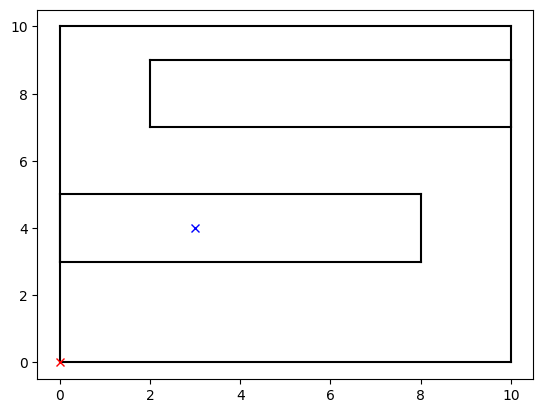

In [53]:
map_gen(field_lim, obj_list)

In [54]:
# Set R2T2 param
delt = .1

# Set Vehicle param
theta_init = 0
vmax = 1.5

Initial Point: (0, 0)
Final Point:   (3, 4)
([0, -1.7198364983916585], [0, 1.2679214769613463], [0, 5.729539673107188])
([0, -0.25731028532519673], [0, -1.7285847237015926], [0, 9.1379469606472])
([-1.7198364983916585, -2.6603003042266673], [1.2679214769613463, 1.4443667530038535], [5.729539673107188, 12.775199413705566])
([-1.7198364983916585, -0.5169525630037799], [1.2679214769613463, 1.551713227998372], [5.729539673107188, 8.173645573771697])


NameError: name 'adfasdfsa' is not defined

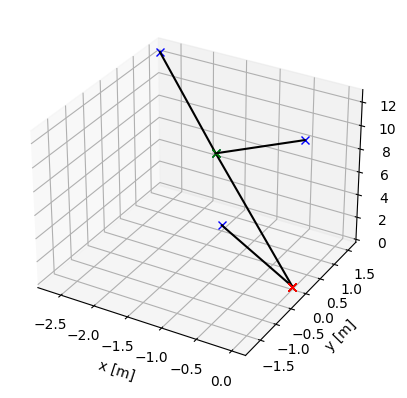

In [57]:
# R2T2 Algorithm
print('Initial Point: '+str(xinit))
print('Final Point:   '+str(xfin))

# Set initial variables
qnear = xinit
G = {}
G['vertex'] = []
G['edge'] = {}
G['t'] = []
G['vertex'].append(qnear)
G['t'].append(0)

repeat_R2T2 = True
debug = False
debug_plot = False
counter = 1

fig = plt.figure()
plt.axes(projection ='3d')


while repeat_R2T2 is True:
    """
    1. Generate Random t
    2. Find range of r it can reach
    3. Generate random coordinate x1, and check whether or not it is located inside the cone, and find closest qnear // Or can we select any number within cone volume?
    4. IF x1 is located inside code, connect it with start point x0 // IF x1 NOT located in cone, regen random coordinate
    5. Repeat 3-4 until cone include final point
    6. Connect from xfin to xinit and generate path
    """
    # Step 1
    # Generate Random t
    ti = rn.uniform(0, 10) # This should generate ti between 0 and 10
        
    # Step 2
    r = vmax*ti
    
    # Step 3
    # First generate cone along delt
    tivec = np.arange(0, ti+delt, delt) # tivec generated over z axis
    angvec = np.linspace(0,2*np.pi,20);
    
    for tii in tivec:
        # for each element in tivec, generate circle:
        circle_xi = vmax*tii*np.cos(angvec)+qnear[0]
        circle_yi = vmax*tii*np.sin(angvec)+qnear[1]
        #plt.plot(circle_xi, circle_yi, tii, '--k')
    
    # Generate random point which is within base plane of the cone
    gen_node = True
    while gen_node:
        qrand_x = rn.uniform(-r, r)
        qrand_y = rn.uniform(-r, r)
        qrand = (qrand_x+qnear[0], qrand_y+qnear[1])
        if qrand_x**2 + qrand_y**2 <= r:
            gen_node = False
    
    # Find closest qnear
    range_vec = []
    for ii in range(len(G['vertex'])):
        vert_avail = G['vertex'][ii]
        temp = G['t'][ii]
        range_vec.append(np.sqrt((qrand[0] - vert_avail[0])**2 + (qrand[1] - vert_avail[1])**2))# + (temp-ti)**2))
    qnear = G['vertex'][range_vec.index(min(range_vec))]
    ti_qnear = G['t'][range_vec.index(min(range_vec))]
    #print('ti_qnear: '+str(ti_qnear))
    #print('ti:       '+str(ti))
    
    plt.plot(qrand[0], qrand[1], ti_qnear+ti, 'xb')
    plt.plot(qnear[0], qnear[1], ti_qnear, 'xg')
    plt.plot([qnear[0], qrand[0]], [qnear[1], qrand[1]], [ti_qnear, ti+ti_qnear], '-k')
    plt.plot(xinit[0], xinit[1], 0, 'xr')
    
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    #plt.zlabel('t [sec]')
    
    # Step 4
    # Path generated between qnear to qrand
    
    if debug_plot:
        fig2 = plt.figure()
        plt.plot([qnear[0], qrand[0]], [qnear[1], qrand[1]], '-k')
        plt.plot(qrand[0], qrand[1], 'xb')
        plt.plot(qnear[0], qnear[1], 'xr')
    
    #print('qnear: '+str(qnear))
    
    edge = [qnear[0], qrand[0]], [qnear[1], qrand[1]], [ti_qnear, ti+ti_qnear] # Later to be replaced with SE2 trajectory generation
    print(edge)
    G['vertex'].append(qrand)
    G['edge'][str(counter)] = edge
    G['t'].append(ti_qnear+ti)
    #print(G['vertex'])
    #print(G['edge'])
    #print(G['t'])
    #print('========================')
    counter += 1
    
    if counter == 5:
        adfasdfsa

In [58]:
print('Vertex: ', G['vertex'])
print('t:      ', G['t'])

Vertex:  [(0, 0), (-1.7198364983916585, 1.2679214769613463), (-0.25731028532519673, -1.7285847237015926), (-2.6603003042266673, 1.4443667530038535), (-0.5169525630037799, 1.551713227998372)]
t:       [0, 5.729539673107188, 9.1379469606472, 12.775199413705566, 8.173645573771697]


In [59]:
print(G['edge'])

{'1': ([0, -1.7198364983916585], [0, 1.2679214769613463], [0, 5.729539673107188]), '2': ([0, -0.25731028532519673], [0, -1.7285847237015926], [0, 9.1379469606472]), '3': ([-1.7198364983916585, -2.6603003042266673], [1.2679214769613463, 1.4443667530038535], [5.729539673107188, 12.775199413705566]), '4': ([-1.7198364983916585, -0.5169525630037799], [1.2679214769613463, 1.551713227998372], [5.729539673107188, 8.173645573771697])}


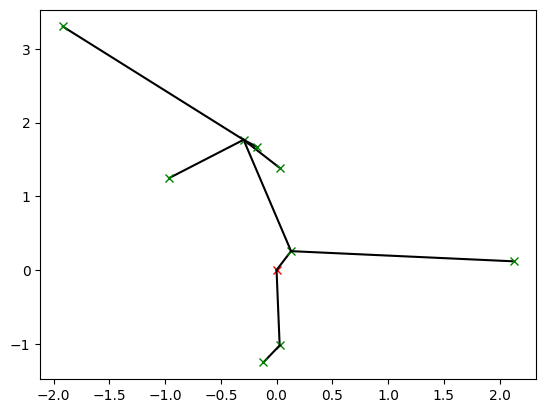

In [34]:
fig2 = plt.figure()
plt.plot(xinit[0], xinit[1], 'xr')
for i in range(len(G['edge'])):
    plt.plot(G['edge'][str(i+1)][0], G['edge'][str(i+1)][1], '-k')
    plt.plot(G['vertex'][i+1][0], G['vertex'][i+1][1], 'xg')
    plt.plot

In [35]:
import shapely
from shapely import geometry
ibuilding = [(1,1), (10,1), (10,10), (1,10)]
xi = (0,0)

In [36]:
a = geometry.LineString(ibuilding)
b = geometry.Point(xi[0], xi[1])
building = geometry.Polygon(a)

In [37]:
kek = []
kek.append(building.contains(b))

print(kek)
print(np.sum(kek))

[False]
0


In [42]:
# simple example for moving obstacle
xinit = (2,4)
xfin = (0,0)
ti = 20

map_size = [-20, 20, -20, 20]

In [48]:
tvec = np.arange(0,ti+1,1)
nt = len(tvec)



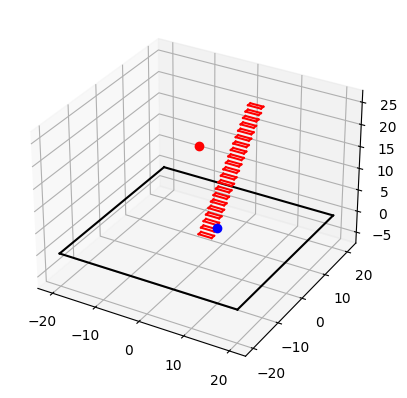

In [49]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
# Map Boundary
plt.plot([map_size[0], map_size[1]], [map_size[2], map_size[2]], 0, '-k')
plt.plot([map_size[0], map_size[1]], [map_size[3], map_size[3]], 0, '-k')
plt.plot([map_size[0], map_size[0]], [map_size[2], map_size[3]], 0, '-k')
plt.plot([map_size[1], map_size[1]], [map_size[2], map_size[3]], 0, '-k')

# Dynamic Obstacle
# Position x = 0 to x = 3, and y = i to y = i+1
# is blocked between t = 0 to ti
# i is incremented with 0.1

obj_vec = []
for i in tvec:
    obj = geometry.Polygon([(0,i), (3,i), (0,i+1), (3,i+1)])
    obj_vec.append(obj)
    ax.plot3D([0, 0], [i, i+1], i, '-r')
    ax.plot3D([3, 3], [i, i+1], i, '-r')
    ax.plot3D([0, 3], [i, i], i, '-r')
    ax.plot3D([0, 3], [i+1, i+1], i, '-r')

# Init / Final node
ax.plot3D(xinit[0], xinit[1], 0, 'ob')
ax.plot3D(xfin[0], xfin[1], ti, 'or')

plt.axis('equal')
plt.show()

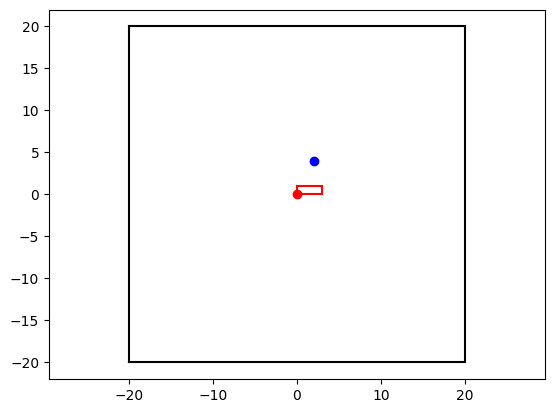

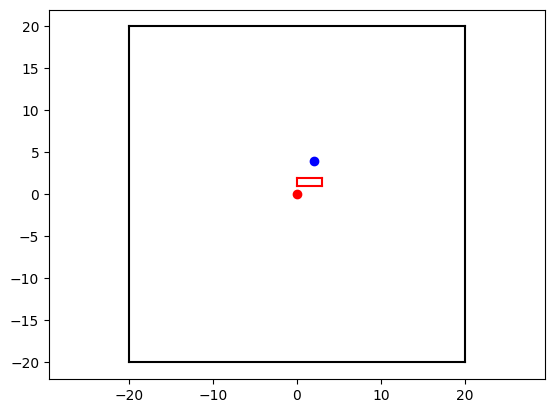

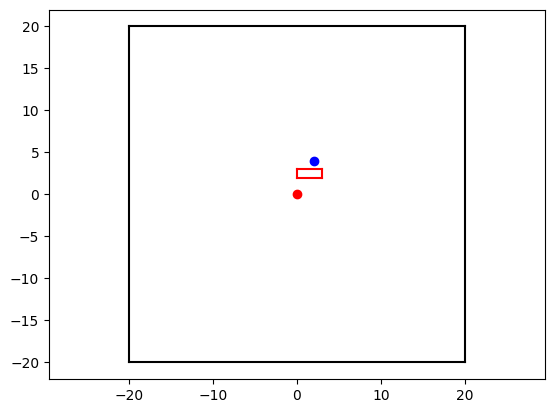

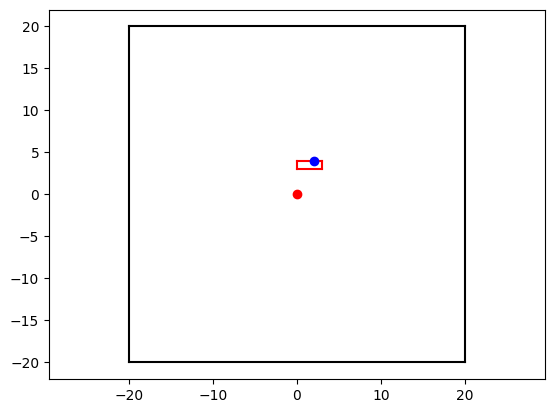

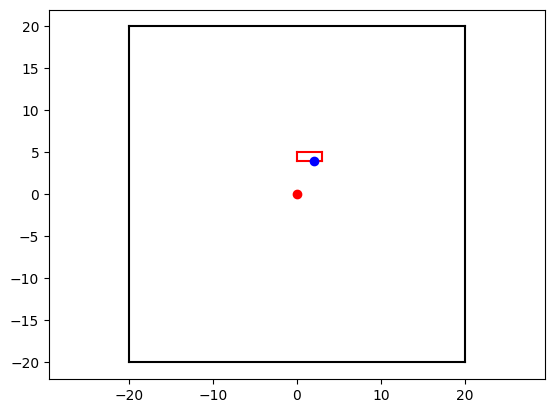

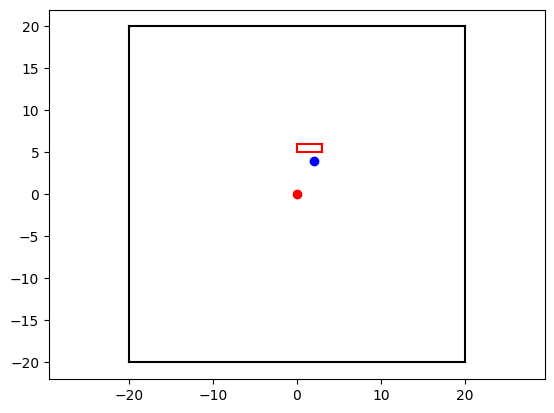

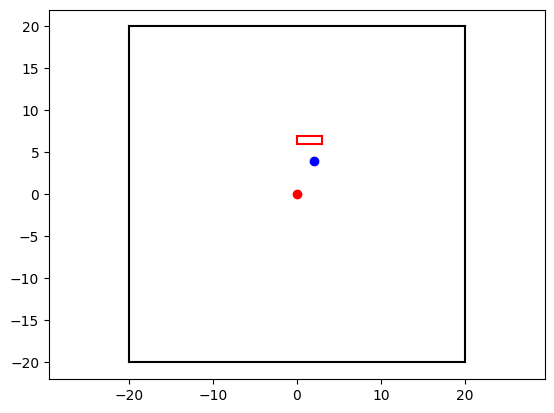

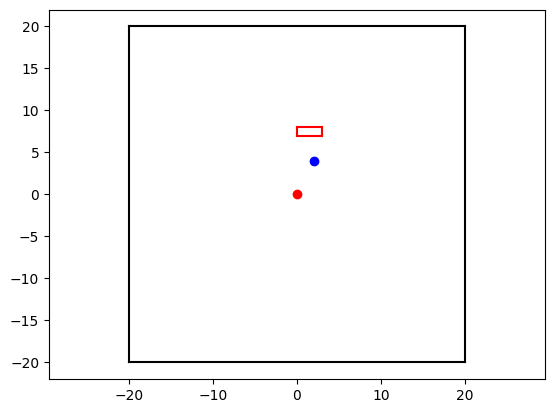

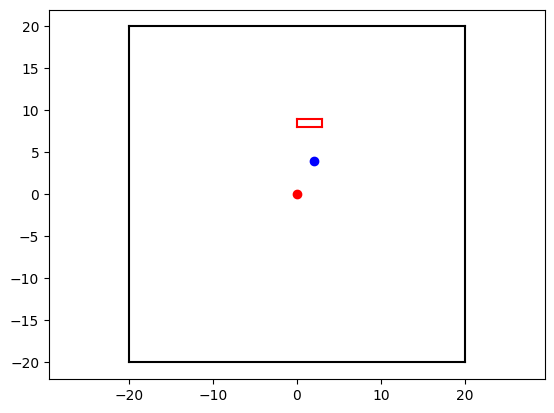

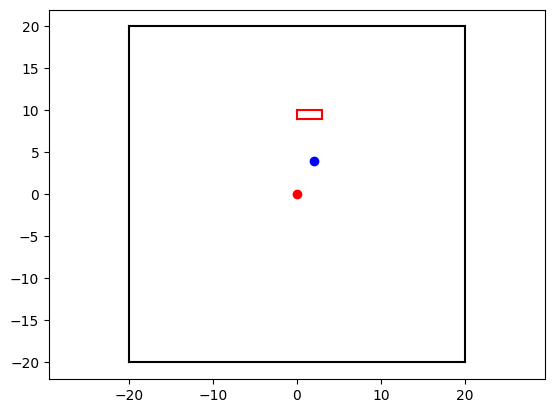

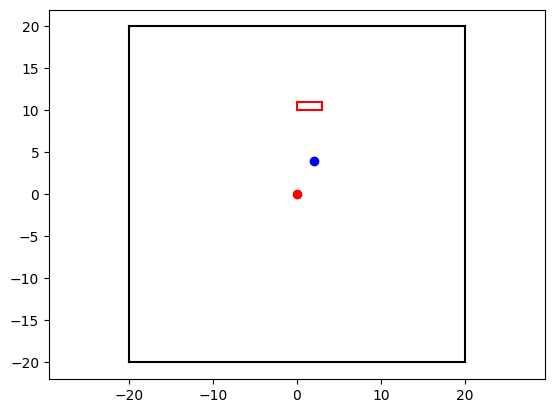

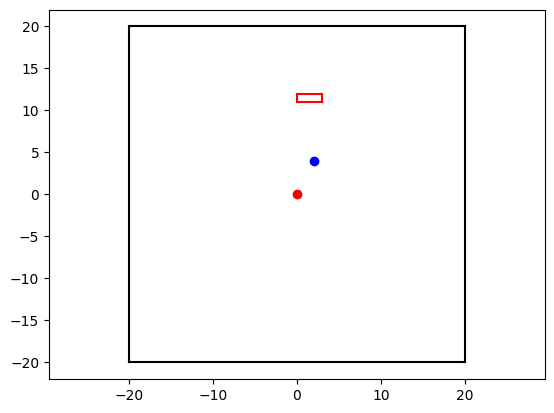

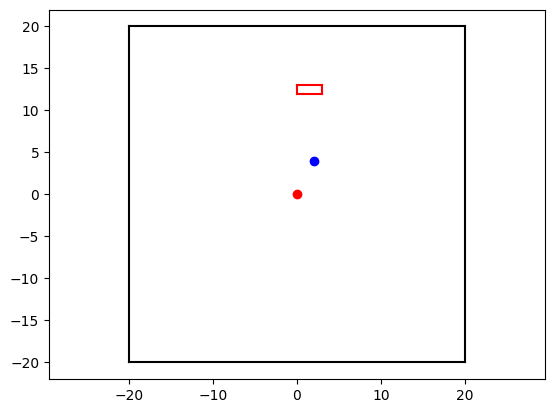

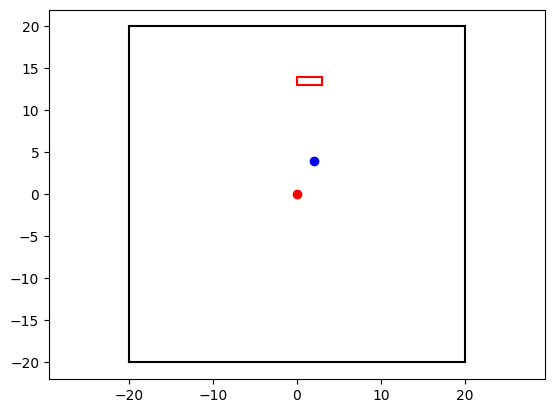

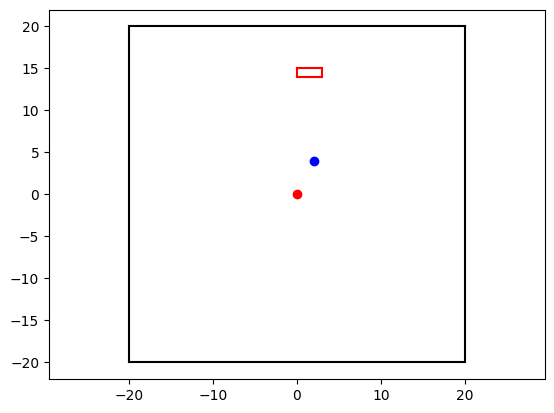

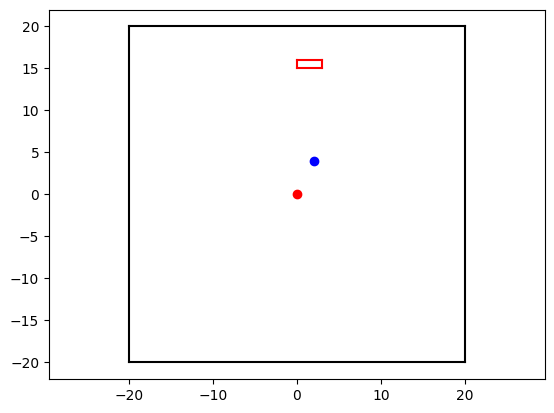

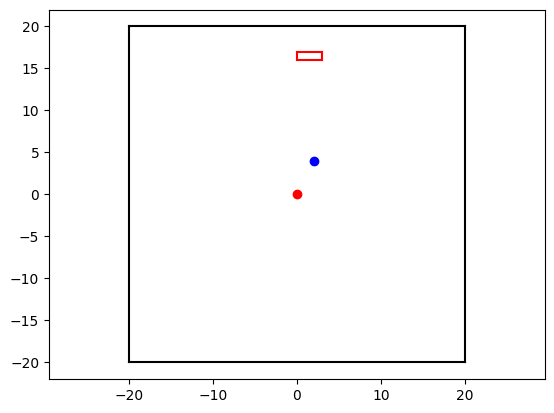

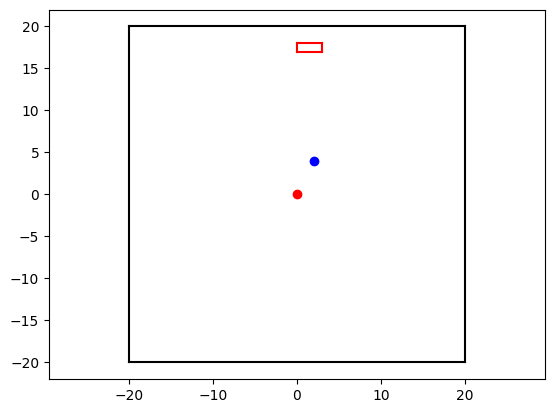

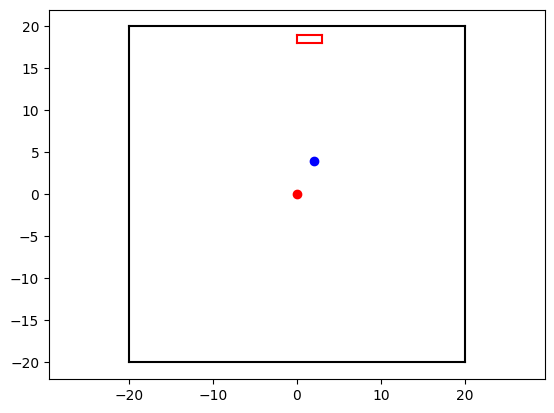

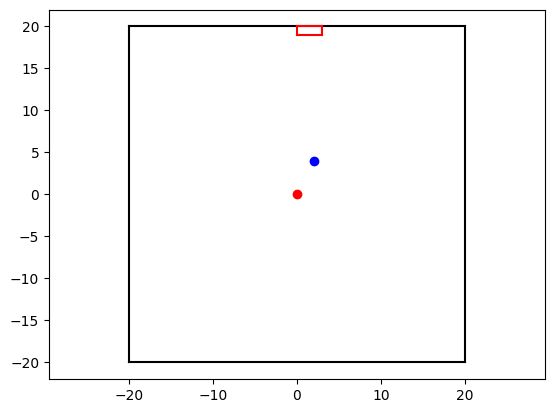

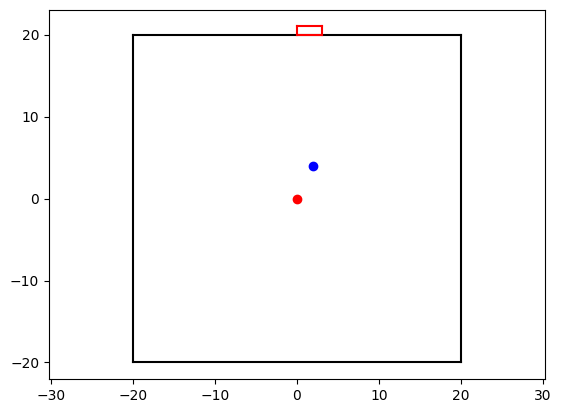

In [50]:
for i in tvec:
    fig = plt.figure()
    # Map Boundary
    plt.plot([map_size[0], map_size[1]], [map_size[2], map_size[2]], '-k')
    plt.plot([map_size[0], map_size[1]], [map_size[3], map_size[3]], '-k')
    plt.plot([map_size[0], map_size[0]], [map_size[2], map_size[3]], '-k')
    plt.plot([map_size[1], map_size[1]], [map_size[2], map_size[3]], '-k')

    # Dynamic Obstacle
    # Position x = 0 to x = 3, and y = i to y = i+1
    # is blocked between t = 0 to ti
    # i is incremented with 0.1
    obj_vec.append(obj)
    plt.plot([0, 0], [i, i+1], '-r')
    plt.plot([3, 3], [i, i+1], '-r')
    plt.plot([0, 3], [i, i], '-r')
    plt.plot([0, 3], [i+1, i+1], '-r')

    # Init / Final node
    plt.plot(xinit[0], xinit[1], 'ob')
    plt.plot(xfin[0], xfin[1], 'or')

    plt.axis('equal')
    plt.show()